In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


def formattingStyle():
    # This will change to your computer's default Times New Roman font
    plt.rcParams["font.family"] = "Calibri"
    
    # setting the font size
    SMALL_SIZE = 12
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 12

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # set the style of the plots
    sns.set_style("white",  {'axes.edgecolor': '0.0', 'axes.linewidth': 0.1, 'grid.color': '.9'}) 

    # set the color palette
    sns.set_palette("RdPu")

    pd.options.display.float_format = '{:,.2f}'.format

formattingStyle()

# color of the graphs 

color = 'deeppink'
text_color = 'dimgray'

# Setting

In [2]:
try:
    from google.colab import drive
    colab = True
    drive.mount('/content/drive')
    data_path = '/content/drive/Shared drives/MSD 23 Drive/Datasets'
    output_path = '/content/drive/Shared drives/MSD 23 Drive/Figures'
except:
    colab = False
    data_path = './MSD Datathon Files/Datasets/'
    output_path = './MSD Datathon Report/figures/'

print('Data path: ', data_path)
print('Output path: ', output_path)

Data path:  ./MSD Datathon Files/Datasets/
Output path:  ./MSD Datathon Report/figures/


In [5]:
# load data
df_treatments = pd.read_csv(os.path.join(data_path, 'treatments_2017-2020.csv'))

print(df_treatments.shape)
df_treatments.head(2)

(4049136, 82)


,REASON,FRSTUSE2,EMPLOY_D,MARSTAT,PRIMINC,TRNQFLG,NOPRIOR,PREG,METHUSE,FRSTUSE3,...,METHFLG,FREQ3,CASEID,OTHERFLG,cbsatitle,metropolitanmicropolitanstatis,countycountyequivalent,statename,fipscountycode,centraloutlyingcounty
0,6,-9,1,-9,-9,0,0,2,1,-9,...,0,-9,20171463590,0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",Metropolitan Statistical Area,San Luis Obispo County,California,79,Central
1,4,6,4,-9,-9,0,1,1,1,-9,...,0,-9,20171390962,0,"Chico, CA",Metropolitan Statistical Area,Butte County,California,7,Central


In [6]:
inds = df_treatments['CBSA'].value_counts()[df_treatments['CBSA'].value_counts() > 1000].index
df = df_treatments[df_treatments['CBSA'].isin(inds)]
# df = df[(df['SERVICES'] == 5) & (df[df['SUB1'] == 5])]

In [7]:
res = pd.DataFrame((df[df['REASON'].isin([2,3,5,6])].groupby(by='CBSA').count()['REASON']/df.groupby(by='CBSA').count()['REASON']).sort_values())
res = pd.merge(res, pd.DataFrame((df[df['LIVARAG'] == 1].groupby(by='CBSA').count()['LIVARAG']/df.groupby(by='CBSA').count()['LIVARAG']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['ARRESTS'] != 0].groupby(by='CBSA').count()['ARRESTS']/df.groupby(by='CBSA').count()['ARRESTS']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['DAYWAIT'] == 4].groupby(by='CBSA').count()['DAYWAIT']/df.groupby(by='CBSA').count()['DAYWAIT']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['PSOURCE'].isin([2,3])].groupby(by='CBSA').count()['PSOURCE']/df.groupby(by='CBSA').count()['PSOURCE']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['PSOURCE'] == 7].groupby(by='CBSA').count()['PSOURCE']/df.groupby(by='CBSA').count()['PSOURCE']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['NOPRIOR'] == 0].groupby(by='CBSA').count()['NOPRIOR']/df.groupby(by='CBSA').count()['NOPRIOR']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['SUB1'] == 2].groupby(by='CBSA').count()['SUB1']/df.groupby(by='CBSA').count()['SUB1']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'SUB1':'Sub1AlcRate'})
res = pd.merge(res, pd.DataFrame((df[df['SUB1'] == 3].groupby(by='CBSA').count()['SUB1']/df.groupby(by='CBSA').count()['SUB1']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'SUB1':'Sub1CocRate'})
res = pd.merge(res, pd.DataFrame((df[df['SUB1'] == 5].groupby(by='CBSA').count()['SUB1']/df.groupby(by='CBSA').count()['SUB1']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'SUB1':'Sub1HerRate'})
res = pd.merge(res, pd.DataFrame((df[df['PSYPROB'] == 1].groupby(by='CBSA').count()['PSYPROB']/df.groupby(by='CBSA').count()['PSYPROB']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = pd.merge(res, pd.DataFrame((df[df['HLTHINS'] == 1].groupby(by='CBSA').count()['HLTHINS']/df.groupby(by='CBSA').count()['HLTHINS']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'HLTHINS':'PrivHIRate'})
res = pd.merge(res, pd.DataFrame((df[df['HLTHINS'] == 2].groupby(by='CBSA').count()['HLTHINS']/df.groupby(by='CBSA').count()['HLTHINS']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'HLTHINS':'MedicaidRate'})
res = pd.merge(res, pd.DataFrame((df[df['HLTHINS'] == 3].groupby(by='CBSA').count()['HLTHINS']/df.groupby(by='CBSA').count()['HLTHINS']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'HLTHINS':'UninsuredRate'})
res = pd.merge(res, pd.DataFrame((df[df['HLTHINS'] == 4].groupby(by='CBSA').count()['HLTHINS']/df.groupby(by='CBSA').count()['HLTHINS']).sort_values()).fillna(0), 
               left_index=True, right_index=True)
res = res.rename(columns={'HLTHINS':'NoHIRate'})
res = pd.merge(res, pd.DataFrame((df[df['PRIMPAY'] == 6].groupby(by='CBSA').count()['PRIMPAY']/df.groupby(by='CBSA').count()['PRIMPAY']).sort_values()).fillna(0), 
               left_index=True, right_index=True)

res = res.rename(columns={"REASON": "FailRate", 'LIVARAG': 'HomelessRate', 'ARRESTS': '>0Arrests', 'DAYWAIT': '>31DayWait', 'PSOURCE_x': 'RecCareProvRate', 
                          'PSOURCE_y': 'RecLawERate','NOPRIOR': 'NoPriorRate', 'PSYPROB': 'MentIllRate', 'PRIMPAY':'NoChargeRate'})

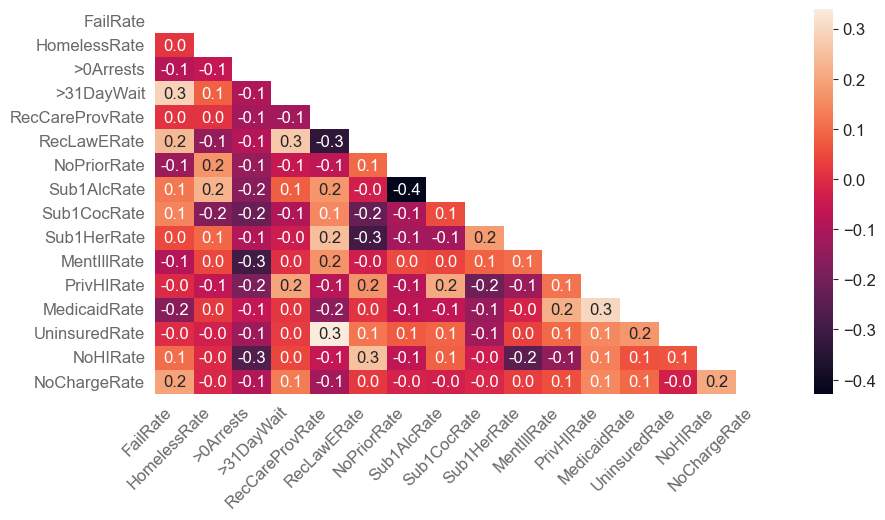

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
corr = res.corr()
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr ,  mask=matrix, annot=True, fmt=',.1f')
# color of the labels axis

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', color=text_color)
ax.set_yticklabels(ax.get_xticklabels(),  horizontalalignment='right', color=text_color)


name = 'corr.pdf'
file = os.path.join(output_path, name)
plt.savefig(file, dpi=300, bbox_inches='tight')